# Summary - `pandas` and `matplotlib`

Summary of topics covered in Weeks 13-17

Import statement used to access pandas:

In [1]:
import pandas as pd

## `pandas`

### DataFrame

[Week 13: Pandas](../Week13/Week13_01_Pandas.ipynb)

A DataFrame is a 2D ordered data structure containing multiple columns with the same index.

In [2]:
df = pd.DataFrame({"column1": [4, 67, -10, 50], 
                   "column2": [16.0, 1.5, 44.1, 23.9],
                   "column3": [-160, -30, 17, 15]},
                   index = ["a", "b", "c", "d"])
df

,column1,column2,column3
a,4,16.0,-160
b,67,1.5,-30
c,-10,44.1,17
d,50,23.9,15


#### Extracting values

We can access a row using the index and the special pandas [`.loc[]` property](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html):

In [3]:
df.loc["a"]

column1      4.0
column2     16.0
column3   -160.0
Name: a, dtype: float64

*Notice this is followed by square brackets [] and not round brackets like a function.*

We can extract a column from this DataFrame using the column name:

In [4]:
column1 = df["column1"]
print(column1)

a     4
b    67
c   -10
d    50
Name: column1, dtype: int64


We can also look at the index and column values by grabbing the `.index` and `.column` attributes

In [5]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [6]:
df.columns

Index(['column1', 'column2', 'column3'], dtype='object')

#### Applying operations

There are many in-built pandas functions (methods) which you can call on a column (Series), e.g. mean, standard deviation, maximum, position of the maximum for the column ():

In [7]:
print(column1.mean())
print(column1.std())
print(column1.max())
print(column1.argmax())

27.75
36.62763073600766
67
1


See here for a [more complete list of pandas functions (methods)](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#computations-descriptive-stats).

We can also combine data such as two columns (Series) element-wise:

In [8]:
df["column1"] + df["column2"]

a    20.0
b    68.5
c    34.1
d    73.9
dtype: float64

---

### Adding new columns

[Week 13: Pandas Analysis](../Week13/Week13_02_Pandas_Analysis.ipynb)

We can add new columns to our DataFrame using assignment:

In [9]:
new_column = df["column1"] + df["column2"]
df["column4"] = new_column

### Filtering

Filtering a *column (Series)* based on a condition:

In [10]:
column1 = df["column1"]
column1[column1 > 0]

a     4
b    67
d    50
Name: column1, dtype: int64

Filtering a *DataFrame* based on a condition:

In [11]:
df[df["column3"] < 0]

,column1,column2,column3,column4
a,4,16.0,-160,20.0
b,67,1.5,-30,68.5


Filtering based on multiple conditions using a bitwise operator:

In [12]:
df[(df["column3"] < 0) & (df["column1"] > 5)]

,column1,column2,column3,column4
b,67,1.5,-30,68.5


---

## Reading from files

[Week 13: CSV files](../Week13/Week13-14_asynchronous.ipynb); [Week 14: Reading from files](../Week14/Week14_01_Pandas_Reading_Data.ipynb); [Week 14: Data Interpretation](../Week14/Week14_02_Pandas_DataInterpretation.ipynb)

Reading in data from an Excel file using the [`read_excel()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html). The inputs needed will depend on your file.

In [13]:
filename = "../Week14/data/premier-football-results.xlsx"
df = pd.read_excel(filename,
                   skiprows=1,             # Skip header rows
                   sheet_name="2014-2015") # Select sheet
df

,Round,Date,Team 1,FT,Team 2
0,1,Sat Aug 16 2014,Manchester United FC,1-2,Swansea City FC
1,1,Sat Aug 16 2014,West Bromwich Albion FC,2-2,Sunderland AFC
2,1,Sat Aug 16 2014,Leicester City FC,2-2,Everton FC
3,1,Sat Aug 16 2014,Stoke City FC,0-1,Aston Villa FC
4,1,Sat Aug 16 2014,Queens Park Rangers FC,0-1,Hull City AFC
...,...,...,...,...,...
375,38,Sun May 24 2015,Chelsea FC,3-1,Sunderland AFC
376,38,Sun May 24 2015,Leicester City FC,5-1,Queens Park Rangers FC
377,38,Sun May 24 2015,Newcastle United FC,2-0,West Ham United FC
378,38,Sun May 24 2015,Aston Villa FC,0-1,Burnley FC


Reading in data from a CSV (comma seperated variable) file using the [`read_csv()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Again, the inputs needed will depend on your file.

In [14]:
filename = "../Week14/data/AGAGE_CFC-11_global_monthly.csv"
df = pd.read_csv(filename,
                 skiprows=4,                # Skip header rows
                 names = ["time", "cfc11"], # Column names
                 index_col = "time",        # Column to use for the index
                 parse_dates = ["time"],    # Which columns are date times
                 dayfirst = True,           # How to read the date times
                 na_values="-999")          # Handling missing data labelled as "-999"

df

,cfc11
time,
1979-01-01,152.92688
1979-02-01,152.69229
1979-03-01,152.49632
1979-04-01,153.32755
1979-05-01,154.55249
...,...
2017-08-01,228.03204
2017-09-01,228.17218
2017-10-01,228.25922


# Plotting

[Week 12: Adding features to plots](../Week12/Week12_03_Matplotlib_Decoration.ipynb); [Week 15: Plotting](../Week15/Week15_01_Plotting.ipynb); [Week 16: Reviewing plots](../Week16/Week16_01_Plot_Discussion.ipynb)

[Documentation: Matplotlib sample plots](https://matplotlib.org/3.3.3/tutorials/introductory/sample_plots.html)

In [15]:
# Creating some dummy data to plot
import numpy as np
x = np.arange(0, 56, 5)
y1 = x**2
y2 = 2*x - x**2

Import statement for accessing Pyplot submodule within `matplotlib`:

In [16]:
import matplotlib.pyplot as plt

Creating a plot which contains both a line and a scatter plot:

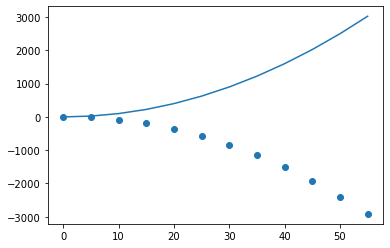

In [17]:
fig, ax = plt.subplots()
ax.plot(x, y1)      # Plot line plot
ax.scatter(x, y2)   # Plot scatter plot as well

Changing and adding additional features to this plot:

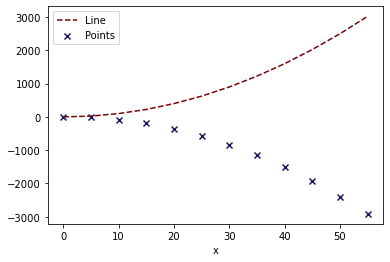

In [18]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="maroon", linestyle="--", label="Line")
ax.scatter(x, y2, color="midnightblue", marker='x', label="Points")

ax.set_xlabel("x")
ax.legend()

For in-built options of colours, line styles and markers see:
- Colours - https://matplotlib.org/api/colors_api.html
- Line style - https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
- Markers - https://matplotlib.org/api/markers_api.html

### pandas plotting

[Week 15: Plotting data from file](../Week15/Week15_02_Plotting_data_from_file.ipynb); [Week 16: Pandas plotting features](../Week16/Week16_02_Data_Plotting.ipynb)

[Documentation: Pandas visualisation](https://pandas.pydata.org/docs/user_guide/visualization.html)

You can create a line plot directly from a pandas DataFrame using the [`.plot.line()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html) (this is the same as using the [`.plot()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)). The column you want to plot can be specified using the `y` keyword.

<AxesSubplot:xlabel='time'>

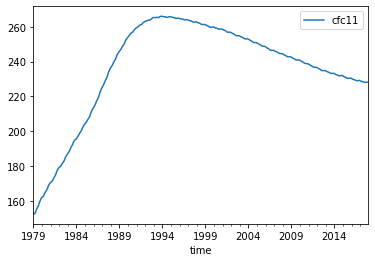

In [19]:
df.plot.line(y="cfc11")

Aside: To make a plot with points which uses the *DataFrame index for the x-axis* you should still use the `.plot.line()` function (*not `.plot.scatter()`* shown below). To do this set a `marker` input to a suitable value and set the `linestyle` input to 'None':

<AxesSubplot:xlabel='time'>

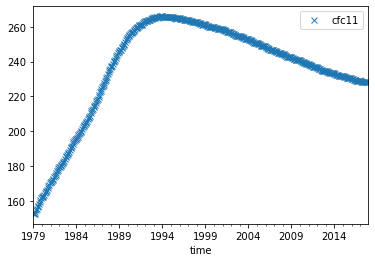

In [20]:
df.plot.line(y="cfc11", marker='x', linestyle='None')

In [21]:
# Reading some data for a simulation of species A --> species B
filename = "../Week15/data/FIRST ORDER_k=0.002.txt"
df2 = pd.read_csv(filename, 
                  delim_whitespace=True) # Split columns by whitespace
df2

,Time,[A],[B]
0,0,1.000000e+00,0.000000
1,100,8.191190e-01,0.180881
2,200,6.709560e-01,0.329044
3,300,5.495920e-01,0.450408
4,400,4.501810e-01,0.549819
...,...,...,...
96,9600,4.800630e-09,1.000000
97,9700,3.932290e-09,1.000000
98,9800,3.221020e-09,1.000000
99,9900,2.638410e-09,1.000000


You can use other pandas plotting functions such as the [`.plot.scatter()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) function to produce other sorts of plots. Here you must specify the column names to use for both `x` and `y`:

(0.0, 0.7)

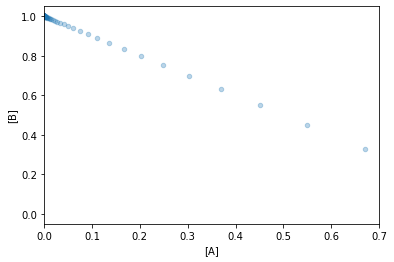

In [22]:
fig, ax = plt.subplots()

df2.plot.scatter(x="[A]", y="[B]", alpha=0.3, ax=ax)

ax.set_xlim(0,0.7)

As shown above, the object oriented method and pandas plotting can be combined to give more control over the produced plot. Pass your created `Axes` object (e.g. `ax`) to the pandas plotting function using the *ax* input keyword.

---